<h2> Nauczanie maszynowe/Ćwiczenia1

In [115]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data['DESCR']) #opis tych danych (DESCRIPTION)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [117]:
d = boston_data['data']
d2 = d[:, [2,5]] #wyciągamy tylko 2 cechy: INDUS, RM
target = boston_data['target']

Funkcja kosztu mierzy średnią różnicę pomiędzy przewidywaniem a rzeczywistą wartością. Istnieje wiele funkcji tego typu, jedna z najpopularniejszych ma postać:

<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(y^{i}-t^{i})^2$
    
 

W przypadku regresji liniowej 2 zmiennych:
    
<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(w_1x_{1}^{i}+w_2x_{2}^{i}+w_0-t^{i})^2$

In [118]:
def loss_function(w1, w2, w0, X, t):
  loss = 0
  ix = 0

  for x in X :
    loss += (w1 * x[0] + w2 * x[1] + w0 - t[ix])**2
    ix += 1

  loss = loss / (2 * len(t))

  return loss

In [119]:
#przykladowe wywolanie
loss_function(3, 8, -1, d2, target)

2088.9192750474317

In [120]:
#przykladowe wywolanie
loss_function(-0.5, 8, -23, d2, target) #lepiej

20.61716585276679

<h4> Zadanie1: Uzupełnij definicję powyższej funkcji.

In [121]:
from sympy import *
def update_weights(w1, w2, w0, X, t, eta):
  old_weights = [w1, w2, w0]
  weights = [0, 0, 0]
  length = len(t)

  ix = 0
  for x in X :
    common = 2 * (w1 * x[0] + w2 * x[1] + w0 - t[ix])
    weights[0] += x[0] * common
    weights[1] += x[1] * common
    weights[2] += common
    ix += 1

  for ix in range(3):
    weights[ix] = weights[ix] / (2 * length)
    weights[ix] = old_weights[ix] - eta * weights[ix]

  return weights

In [122]:
#przykladowe wywolanie
update_weights(3, 8, -1, d2, target, 0.001)

[2.1737704910276685, 7.628145982577075, -1.060154604743083]

<h4> Zadanie2: Uzupełnij definicję powyższej funkcji.

<h4> Zadanie3: Celem jest zbudowanie modelu regresji liniowej przeiwdującej $target$ w oparciu o $d2$. Wystartuj z początkowych parametrów 1, 1 oraz 1. Przyjmując $\eta=0.001$ wykonaj 1000 aktualizacji tych parametrów na podstawie metody gradientu. Narysuj zależność funkcji kosztu od numeru iteracji. Wykonaj analogiczne obliczenia dla $\eta=0.01$ oraz $\eta=0.00001$. Skomentuj otrzymane wyniki.

In [123]:
import matplotlib.pyplot as plt

In [134]:
def make_plot (eta) : 
  list_ = [[i for i in range(1001)],[]]
  list_[1] = ([loss_function(1, 1, 1, d2, target)]) 
  weights = [1,1,1]
  for x in range (1000):
    weights = update_weights(weights[0], weights[1], weights[2], d2, target, eta)
    list_[1].append(loss_function(weights[0], weights[1], weights[2], d2, target)) 

  plt.xlabel("iteration")
  plt.ylabel("cost function")
  plt.title("cost function across iterations")
  plt.plot(list_[0],list_[1])
  plt.show()
  print(weights)

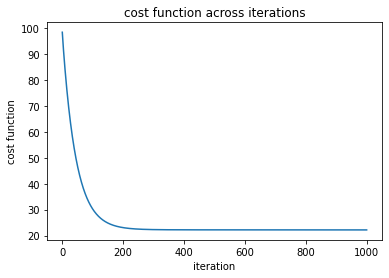

[-0.5240516597773193, 4.3480921568559605, 1.2535642605913597]


In [135]:
make_plot(0.001)

Przy kroku 0.001, minimum osiągane jest po około 200 iteracjach.


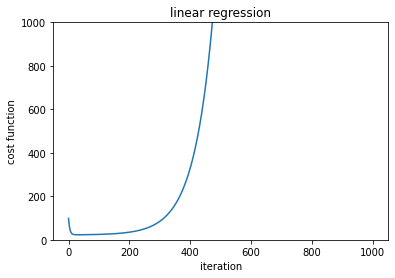

In [112]:
make_plot(0.01) # ylim(0,1000)

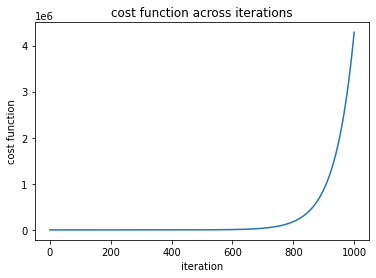

[189.2380160643966, 85.48603274984441, 12.549821709960579]


In [136]:
make_plot(0.01)

Funkcja oscyluje wokół minimum przy zbyt dużym kroku i tym samym w pewnym momencie wypada poza okolicę minimum lokalnego.


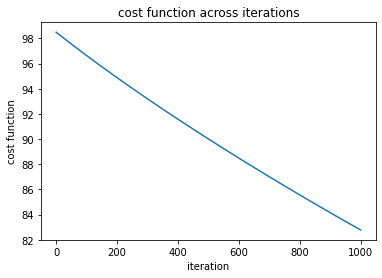

[0.7876743224351483, 1.3296083328779649, 1.043574995600172]


In [137]:
make_plot(0.00001)

Przy kroku 0.00001, minimum nie zostaje osiągnięte po 1000 iteracji.

<h4> Zadanie4: Zazwyczaj nie wiemy z góry ile razy należy zmodyfikować wagi - kiedy dalsza aktualizacja nie przynosi efektu. Jednym z rozwiązań tego problemu jest sprawdzenie o jaki procent zmieniają sie aktualne wagi. Przyjmijmy, że jeżeli zmiana funkcji kosztu jest mniejsza niż 0,1% to przerywamy działanie. Ile kroków należałoby wykonać aby zrealizować poprzednie zadanie?

In [128]:
import sys
weights = [1,1,1]
reference = loss_function(weights[0], weights[1], weights[2], d2, target)
counter, change = 0 , 1
while change > 0.001 :
  weights = update_weights(weights[0], weights[1], weights[2], d2, target, 0.001)
  LF = loss_function(weights[0], weights[1], weights[2], d2, target)
  change = abs(LF - reference) / LF
  counter += 1
  reference = LF

print (counter)



192


Należałoby wykonać 192 kroki.

Oczywiście w Pythonie istnieje implementacja metody regresji liniowej

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
model = LinearRegression()
model.fit(d2, target);

In [131]:
model.coef_ #wspolczynnki dla zmiennych

array([-0.33471389,  7.82205511])

In [132]:
model.intercept_ #wyraz wolny

-22.89831572922507

In [138]:
[-0.5240516597773193, 4.3480921568559605, 1.2535642605913597]

[-0.5240516597773193, 4.3480921568559605, 1.2535642605913597]

<h4> Zadanie5: Porównaj te parametry z otrzymanymi z Zadania3. Z czego może wynikać ta różnica?

Współczynniki 1 i 2 mają zbliżone wartośći, -0,33 i -0,52 oraz 7,8 i 4,34, różnica wynika ze stosowania różnych modeli i sporej różnicy 1.3 w stosowanym przez nas modelu, a -22.9 w zaimplementowanym w sklearn modelu wartości wyrazu zerowego.

<h4> Zadanie6: Rozważ jeszcze raz dane $d2/target$. 
    
- Podziel je na trzy podzbiory - treningowy (60%), walidacyjny (20%) oraz testowy (20%); najlepiej zdefiniuj odpowiednią funkcję. 
- Przetestuj różne wartości parametrów $\eta$ na zbiorze walidacyjnym, na tej podstawie wybierz jeden, który użyjesz do wytrenowania parametrów modelu na zbiórze treningowym. 
- Na końcu wyznacz wartość funkcji kosztu na zbiorze testowym. Skomentuj otrzymane wyniki.

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(d2, target, test_size=0.4, random_state=42)
X2_validate, X2_test, y2_validate, y2_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [159]:
w1, w2, w0 = 1, 1, 1
for i in range(10000):
    w1, w2, w0 = update_weights(w1, w2, w0, X2_validate, y2_validate, 0.0065)
print(w1, w2, w0)

-0.47977834001676806 5.1627540969701835 -4.504380579629465


Po wypróbowaniu ok. 10 wartośći eta, 0.0065 okazała się najlepsza.

In [160]:
w1, w2, w0 = 1, 1, 1
for i in range(10000):
    w1, w2, w0 = update_weights(w1, w2, w0, X_train, y_train, 0.0065)
print(w1, w2, w0)

-0.4026463975152746 5.889706043608482 -9.681275916159734


Następnie obliczono wartości współczynników na zbiorze treningowym.

In [161]:
LF = loss_function(-0.4026463975, 5.8897060436, -9.6812759162, X_test, y_test)

In [162]:
LF

17.731422529829707

Wartość loss function obliczona na zbiorze treningowym wynosi ok. 17.7314, co jest dość dobrym wynikiem, biorąć pod uwagę, że wcześniej wartość ta osiągała minimum przy wartości ok. 25, a im mniejsza wartość funkcji kosztu, tym lepiej.